## Lab_3

---

*Sistemas operativos* ||
**Levis Javier Aguiar Torres** ||
**cc:** 1005664227

## Importar dependencias/librerias necesarias

In [1]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt

## Crear archivos copilados para ejecutar la soluciones propuesas en C

In [2]:
subprocess.run(["gcc", "-o", "pi_p", "pi_p.c", "-lm", "-lpthread"])

subprocess.run(["gcc", "-o", "pi_s", "pi.c", "-lm"])

subprocess.run(["gcc", "-o", "fibonacci", "fibonacci.c", "-lpthread"])

CompletedProcess(args=['gcc', '-o', 'fibonacci', 'fibonacci.c', '-lpthread'], returncode=0)

### Sección 1: Análisis de $\pi$


**Evaluación de $T_s$ (Tiempo Serial)**
 Reporte el tiempo de ejecución de `./pi_s` (con `n = 2000000000`). Este valor será $T_s$.

In [6]:
start_time = time.time()

out = subprocess.run(["./pi_s"], capture_output=True, text=True)

end_time = time.time()

print(out.stdout)

Ts = end_time - start_time
print(f"Tiempo serial T_s: {Ts} segundos")


pi is approximately = 3.14159265358983885719 
Error               = 0.00000000000004574119

Tiempo serial T_s: 6.434478044509888 segundos


**Evaluación de $T_p$ (Tiempo Paralelo)**
Ejecute `./pi_p` (con el mismo n) variando el número de hilos ($N = 1, 2, 4, 8, ...$ hasta $2 \times$ el número de núcleos de su CPU) y reporte los tiempos $T_p(N)$.

In [4]:
hilos  = 12

n = []
Tp = []
speedup = []
eficiencia = []


for i in range(1, hilos + 1):


    start_time = time.time()

    out = subprocess.run(["./pi_p", str(i)], capture_output=True, text=True)

    end_time = time.time()

    time_taken = end_time - start_time

    n.append(i)
    Tp.append(time_taken)
    speedup.append(Ts/ time_taken)
    eficiencia.append((Ts / time_taken) / i)

    
df = pd.DataFrame({
    "Hilos": n,
    "Tiempo (s)": Tp,
    "Speedup": speedup,
    "Eficiencia": eficiencia
})

print(df)

    Hilos  Tiempo (s)   Speedup  Eficiencia
0       1    6.572451  1.008021    1.008021
1       2    3.263193  2.030271    1.015136
2       3    2.203532  3.006611    1.002204
3       4    1.716781  3.859064    0.964766
4       5    1.454813  4.553963    0.910793
5       6    1.179642  5.616252    0.936042
6       7    1.432332  4.625441    0.660777
7       8    1.297256  5.107059    0.638382
8       9    1.345905  4.922462    0.546940
9      10    1.294596  5.117554    0.511755
10     11    1.214492  5.455093    0.495918
11     12    1.221012  5.425964    0.452164


**Gráfico de Speedup**: Incluya un gráfico de líneas (N Hilos vs. Speedup).

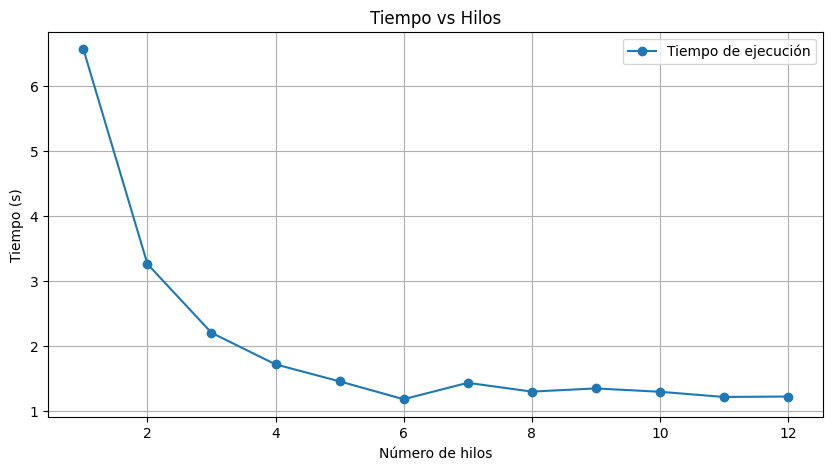

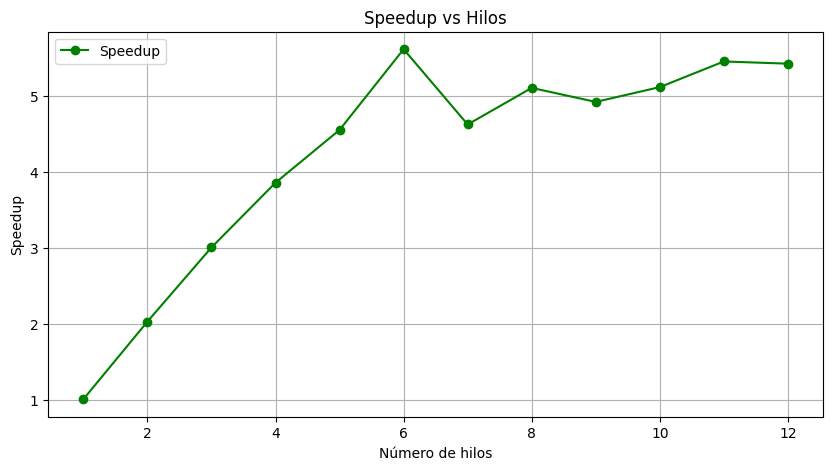

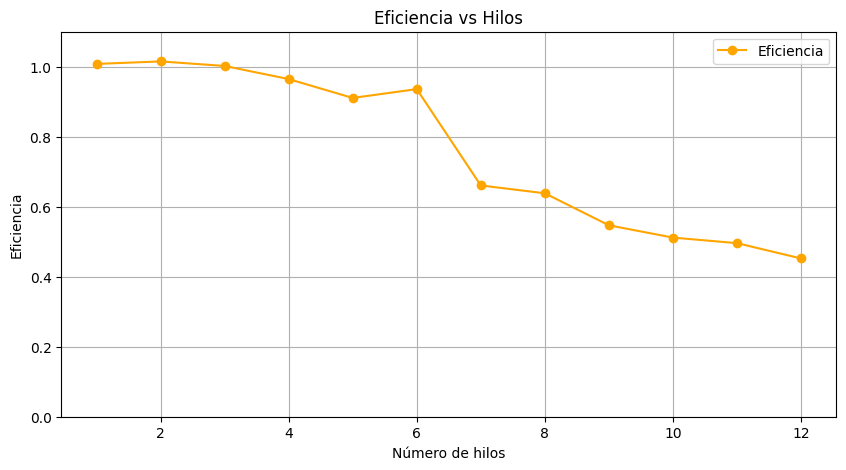

In [5]:
# --- Gráfica Tiempo vs Hilos ---
plt.figure(figsize=(10,5))
plt.plot(df["Hilos"], df["Tiempo (s)"], marker='o', label="Tiempo de ejecución")
plt.xlabel("Número de hilos")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo vs Hilos")
plt.grid(True)
plt.legend()
plt.show()

# --- Gráfica Speedup vs Hilos ---
plt.figure(figsize=(10,5))
plt.plot(df["Hilos"], df["Speedup"], marker='o', color='green', label="Speedup")
plt.xlabel("Número de hilos")
plt.ylabel("Speedup")
plt.title("Speedup vs Hilos")
plt.grid(True)
plt.legend()
plt.show()

# --- Gráfica Eficiencia vs Hilos ---
plt.figure(figsize=(10,5))
plt.plot(df["Hilos"], df["Eficiencia"], marker='o', color='orange', label="Eficiencia")
plt.xlabel("Número de hilos")
plt.ylabel("Eficiencia")
plt.title("Eficiencia vs Hilos")
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()
plt.show()

**Análisis de Resultados (Parte 1):**
   * Realice una comparación entre el rendimiento de $T_p(1)$ y $T_s$. Explique cualquier discrepancia (overhead).
   * Analice el Speedup máximo alcanzado. ¿Cómo se compara con el número de núcleos físicos de su sistema?
   * Describa la tendencia de la eficiencia a medida que $N$ incrementa y explique las causas de dicho comportamiento.

- 1. Comparación entre $T_p(1)$ y $T_s$ y explicación del overhead

Al comparar el tiempo paralelo con un solo hilo $T_p(1)$ = 6.572451𝑠 y el tiempo serial $T_s$ = 6.434478s, se observa que el programa con un hilo es ligeramente más lento que la versión totalmente secuencial. Esta discrepancia se debe al overhead introducido por el modelo de hilos: crear un hilo, pasar estructuras por parámetro, esperar con pthread_join y manejar memoria adicional implica operaciones extra que no existen en la versión serial. El cálculo interno es el mismo en ambos programas, por lo que cualquier diferencia se explica casi por completo por ese costo adicional de administración del hilo.

- 2. Análisis del Speedup máximo considerando que tu procesador tiene 12 CPU

El speedup máximo que se logra es de alrededor de 5.6× usando 5–6 hilos, es completamente consistente con un procesador que tiene 6 núcleos físicos y 12 hilos lógicos. Aunque mi sistema reporte “12 CPU”, solo hay 6 núcleos reales, y eso es lo que determina el límite práctico del paralelismo en un cálculo intensivo como este. Por eso el speedup crece casi linealmente hasta los 6 hilos, pero deja de aumentar cuando pasas ese punto: los hilos adicionales ya no tienen un núcleo físico exclusivo y deben compartir recursos mediante Hyper-Threading, lo cual no duplica el rendimiento; de hecho, suele aportar mejoras muy pequeñas o incluso nulas para cargas CPU-bound como este cálculo de π. Por eso el mejor speedup está cerca de 6, muy alineado con el número real de núcleos, y no se acerca a 12 pese a que el sistema reporte 12 CPUs lógicas.

- 3. Tendencia de la eficiencia al incrementar $N$ (número de hilos) y causas

La eficiencia es alta mientras el número de hilos es igual o menor al número de núcleos físicos, pero comienza a disminuir a partir de ahí. Esto ocurre porque al incrementar los hilos más allá de la capacidad física del procesador, los hilos empiezan a compartir CPU mediante context switching, lo que añade latencia y reduce la eficiencia. Además, aunque la carga está bien distribuida, el costo fijo de coordinar y crear hilos se vuelve más significativo al añadir más paralelismo del necesario. En resumen, la eficiencia cae porque el hardware ya no puede ejecutar todos los hilos simultáneamente y el overhead de gestión supera la ganancia en cómputo

### Sección 2: Análisis de Fibonacci

**Resultados de Ejecución**: Incluya la salida de su programa `./fibonacci 15`.

    Tamaño  Tiempo (s)  Eficiencia
0        1    0.000971    1.000000
1        2    0.000765    0.634507
2        3    0.000609    0.531323
3        4    0.000673    0.360393
4        5    0.000652    0.297805
5        6    0.000652    0.248080
6        7    0.000623    0.222483
7        8    0.000630    0.192464
8        9    0.000598    0.180284
9       10    0.000628    0.154497
10      11    0.000628    0.140612
11      12    0.000743    0.108804
12      13    0.000754    0.099037
13      14    0.000704    0.098471
14      15    0.000596    0.108647


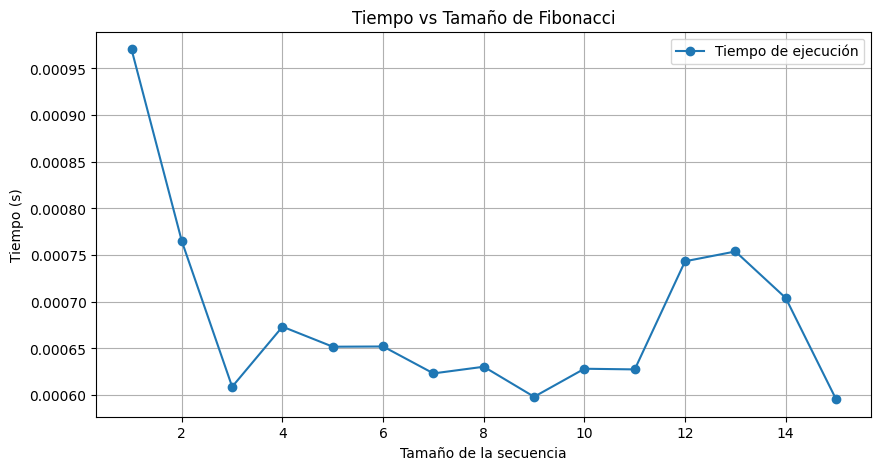

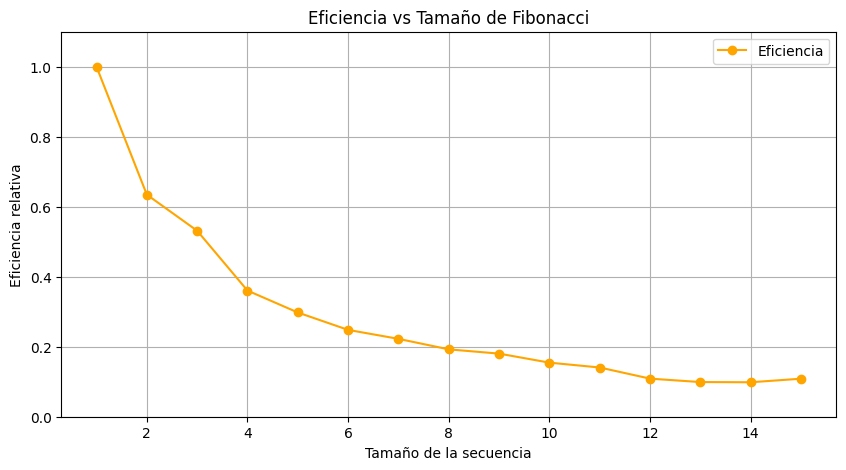

In [ ]:
size = 15

f_out_thread = []
f_out_time = []

for i in range(1, size + 1):

    start_time = time.time()

    out = subprocess.run(["./fibonacci", str(i)], capture_output=True, text=True)

    end_time = time.time()

    time_taken = end_time - start_time


    f_out_thread.append(i)
    f_out_time.append(time_taken)


df = pd.DataFrame({
    "Tamaño": f_out_thread,
    "Tiempo (s)": f_out_time
})

# Calcular eficiencia relativa (opcional)
T1 = df["Tiempo (s)"].iloc[0]  # tiempo con tamaño 1
df["Eficiencia"] = T1 / (df["Tamaño"] * df["Tiempo (s)"])

print(df)

# --- Gráfica Tiempo vs Tamaño ---
plt.figure(figsize=(10,5))
plt.plot(df["Tamaño"], df["Tiempo (s)"], marker='o', label="Tiempo de ejecución")
plt.xlabel("Tamaño de la secuencia")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo vs Tamaño de Fibonacci")
plt.grid(True)
plt.legend()
plt.show()

# --- Gráfica Eficiencia vs Tamaño ---
plt.figure(figsize=(10,5))
plt.plot(df["Tamaño"], df["Eficiencia"], marker='o', color='orange', label="Eficiencia")
plt.xlabel("Tamaño de la secuencia")
plt.ylabel("Eficiencia relativa")
plt.title("Eficiencia vs Tamaño de Fibonacci")
plt.ylim(0,1.1)
plt.grid(True)
plt.legend()
plt.show()


**Análisis del Diseño (Parte 2)**:
   * Describa el mecanismo utilizado para transferir datos (el puntero al arreglo y $N$) del hilo principal al hilo trabajador.
   * Explique el rol de `pthread_join` como mecanismo de sincronización en este problema, asegurando que `main` no acceda a los resultados antes de que sean generados.

## 1. Mecanismo de transferencia de datos del hilo principal al hilo trabajador

- 1. El programa envía los datos al hilo trabajador mediante una estructura (`fib_arg_t`) que guarda el puntero al arreglo y el valor `N`; esta estructura se pasa por referencia a `pthread_create`, permitiendo que el hilo acceda directamente a la misma memoria creada por el hilo principal sin copiar nada y tenga toda la información necesaria para generar la secuencia.

- 2. `pthread_join` actúa como el mecanismo de sincronización entre hilos, ya que obliga al hilo principal a esperar hasta que el hilo trabajador termine de calcular la serie antes de continuar; gracias a esto, el `main` no imprime ni accede al arreglo antes de que esté completamente llenado, evitando errores o lecturas inconsistente